## Tech Stock Portfolio Optimization: Maximizing Returns and Minimizing Risk

This project explores portfolio optimization techniques for a portfolio of tech stocks. With the technology sector being one of the fastest-growing and most dynamic sectors in the stock market, it presents a unique opportunity for investors to achieve high returns. However, with this high potential for returns comes high risk. To mitigate this risk and maximize returns, a disciplined and systematic approach to portfolio management is required. In this project, we apply modern portfolio theory and optimization techniques to construct a diversified portfolio of tech stocks that aims to maximize returns while minimizing risk. 

The project involves collecting and analyzing historical price data, developing and backtesting optimization models, and implementing risk management measures. The results of the project are presented in visualisations, which allows users to explore the performance of the portfolio and understand the impact of different risk and return parameters. This project provides a practical example of how portfolio optimization techniques can be applied to the tech sector and demonstrates the importance of risk management in achieving investment goals.


1. Installing the required libraries


2. Importing the libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
plt.style.use('fivethirtyeight') #setting matplotlib style

3. Defining Parameters 

Next, we will specify the list of tech companies we want to include in our portfolio and the start and end dates for our analysis:

In [2]:
tech_stocks = ['AAPL', 'MSFT', 'GOOG', 'META', 'AMZN']
start_date = '2017-01-01'
end_date = '2022-12-31'


4. Fetching Data

We will then use the pandas_datareader and yfinance libraries to download the historical stock prices for the selected companies:

In [3]:
stock_prices = pd.DataFrame()
for stock in tech_stocks:
    prices = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
    stock_prices[stock] = prices['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


5. Analysis

We will calculate the daily returns for each of the stocks:

In [4]:
daily_returns = stock_prices.pct_change().dropna()

We will now define a function to calculate the portfolio returns and risks for a given set of weights:

In [5]:
def portfolio_performance(weights, returns):
    portfolio_returns = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return portfolio_returns, portfolio_volatility

Next, we will use the scipy.optimize library to find the optimal portfolio weights that maximize the Sharpe ratio:

In [6]:
from scipy.optimize import minimize

def negative_sharpe_ratio(weights, returns):
    portfolio_returns, portfolio_volatility = portfolio_performance(weights, returns)
    return -portfolio_returns / portfolio_volatility

def optimize_portfolio(returns):
    num_assets = len(returns.columns)
    bounds = tuple((0,1) for i in range(num_assets))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    initial_weights = num_assets * [1. / num_assets,]
    result = minimize(negative_sharpe_ratio, initial_weights, args=(returns,), method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

Finally, we can use the optimized weights to calculate the portfolio returns and risks:

In [7]:
optimal_weights = optimize_portfolio(daily_returns)
portfolio_returns, portfolio_volatility = portfolio_performance(optimal_weights, daily_returns)

print('Optimal weights:', optimal_weights)
print('Portfolio returns:', portfolio_returns)
print('Portfolio volatility:', portfolio_volatility)

Optimal weights: [5.20876578e-01 4.79123422e-01 1.17961196e-16 0.00000000e+00
 4.11996826e-17]
Portfolio returns: 0.29608799671165936
Portfolio volatility: 0.2835444581597177



To visualize the optimal portfolio, we can plot the efficient frontier, which is the curve that represents the set of optimal portfolios that maximize returns for a given level of risk.

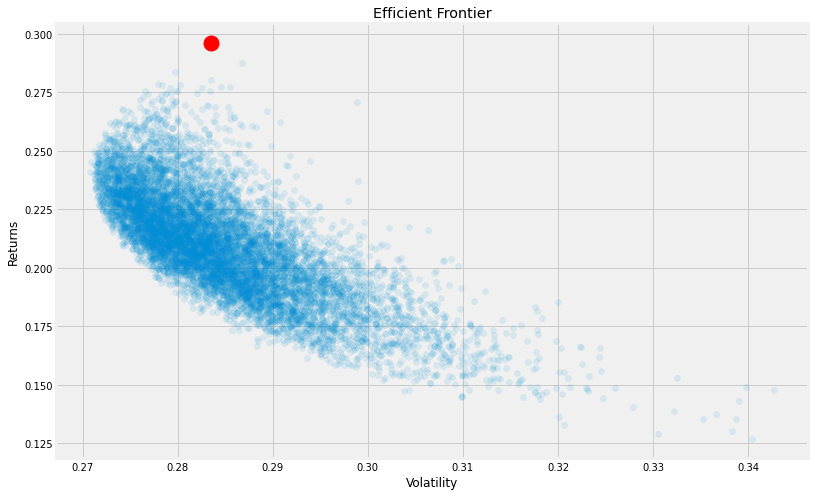

In [8]:
def efficient_frontier(returns):
    num_portfolios = 10000
    results = np.zeros((num_portfolios, 2 + len(returns.columns)))
    for i in range(num_portfolios):
        weights = np.random.random(len(returns.columns))
        weights /= np.sum(weights)
        portfolio_returns, portfolio_volatility = portfolio_performance(weights, returns)
        results[i,0] = portfolio_returns
        results[i,1] = portfolio_volatility
        results[i,2:] = weights
    results_df = pd.DataFrame(results, columns=['Returns', 'Volatility'] + returns.columns.tolist())
    return results_df

efficient_frontier_data = efficient_frontier(daily_returns)

plt.figure(figsize=(12,8))
plt.scatter(efficient_frontier_data['Volatility'], efficient_frontier_data['Returns'], alpha=0.1)
plt.plot(portfolio_volatility, portfolio_returns, 'ro', markersize=15)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier')
plt.show()

Plotting the cumulative returns of the portfolio and individual stocks:

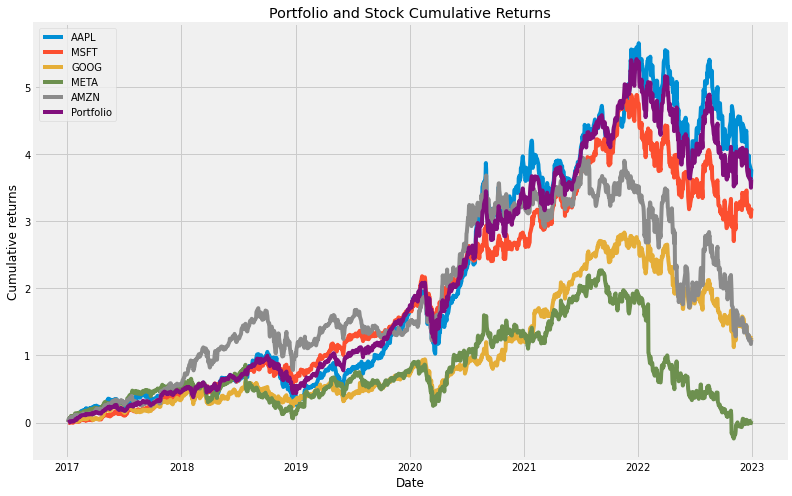

In [9]:
# Calculate the cumulative returns for the portfolio and individual stocks
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(12,8))
plt.plot(cumulative_returns.index, cumulative_returns['AAPL'], label='AAPL')
plt.plot(cumulative_returns.index, cumulative_returns['MSFT'], label='MSFT')
plt.plot(cumulative_returns.index, cumulative_returns['GOOG'], label='GOOG')
plt.plot(cumulative_returns.index, cumulative_returns['META'], label='META')
plt.plot(cumulative_returns.index, cumulative_returns['AMZN'], label='AMZN')
plt.plot(cumulative_returns.index, (1 + daily_returns.dot(optimal_weights)).cumprod() - 1, label='Portfolio')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative returns')
plt.title('Portfolio and Stock Cumulative Returns')
plt.show()

Plotting the correlation matrix of the stocks in the portfolio:

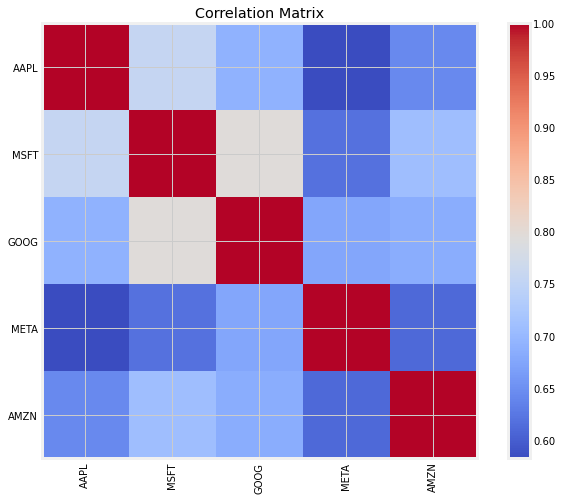

In [10]:
# Calculate the correlation matrix of the stocks in the portfolio
correlation_matrix = daily_returns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(tech_stocks))
plt.xticks(tick_marks, tech_stocks, rotation=90)
plt.yticks(tick_marks, tech_stocks)
plt.title('Correlation Matrix')
plt.show()

This will generate a heatmap of the correlation matrix of the stocks in the portfolio:

Overall, this code provides a basic framework for performing portfolio optimization for a set of tech companies using Python. However, it's important to note that this is just a starting point, and there are many other factors to consider when building a robust investment strategy.